## Optimización de parámetros con LightGBM

In [1]:
import pandas as pd

dataset_work_3 = pd.read_csv('D:\DataSet\dataset_work_transformed.csv')
x = dataset_work_3.iloc[:,:-1]
y = dataset_work_3.iloc[:,-1].values
dataset_work_3.shape

(6435823, 16)

In [2]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler

# Registro del tiempo de inicio
start_time = time.time()

# Cargar dataset
X = dataset_work_3.drop(columns=["MOROSIDAD"])
y = dataset_work_3["MOROSIDAD"]

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Definición del espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [20, 31, 50],
    'max_depth': [-1, 10, 20],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Inicializar el modelo y RandomizedSearchCV
lgbm = LGBMClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=10,  # Número de combinaciones a probar
    cv=3,  # Validación cruzada
    verbose=2,
    random_state=42,
    scoring='roc_auc',
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Entrenar el modelo con la búsqueda de hiperparámetros
random_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = random_search.best_params_
print("Mejores parámetros encontrados:", best_params)

# Entrenar el modelo final con los mejores parámetros
best_model = LGBMClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

# Registro del tiempo de finalización
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60
print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 1889386, number of negative: 2615690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.142591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2131
[LightGBM] [Info] Number of data points in the train set: 4505076, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419390 -> initscore=-0.325276
[LightGBM] [Info] Start training from score -0.325276
Mejores parámetros encontrados: {'subsample': 1.0, 'num_leaves': 50, 'n_estimators': 200, 'min_child_samples': 30, 'max_depth': 20, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
[LightGBM] [Info] Number of positive: 1889386, number of negative: 2615690
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.110565 seconds.
You can set `forc

## **Matriz de Confusión con Mapa de Calor**

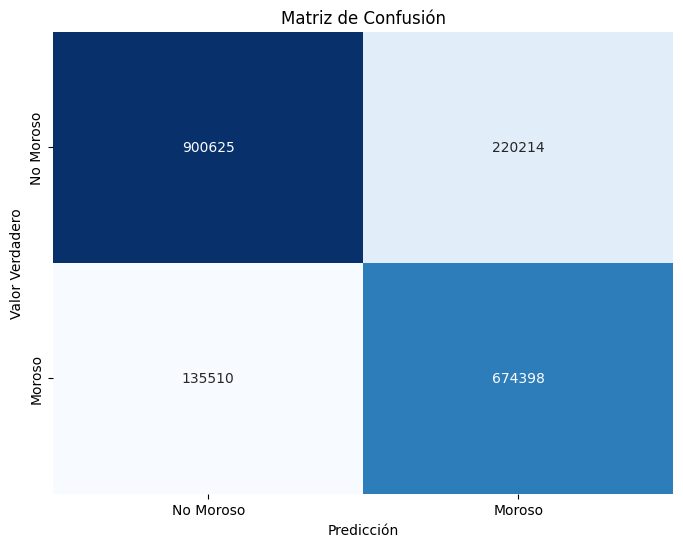

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Moroso', 'Moroso'], yticklabels=['No Moroso', 'Moroso'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Verdadero")
plt.show()